In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df=pd.read_csv('weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


## Exploratory data analysis

In [4]:
df.shape

(145460, 23)

In [5]:
col_names=df.columns
col_names

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.0,12.194034,6.398495,-8.5,7.6,12.0,16.9,33.9
MaxTemp,144199.0,23.221348,7.119049,-4.8,17.9,22.6,28.2,48.1
Rainfall,142199.0,2.360918,8.478060,0.0,0.0,0.0,0.8,371.0
Evaporation,82670.0,5.468232,4.193704,0.0,2.6,4.8,7.4,145.0
Sunshine,75625.0,7.611178,3.785483,0.0,4.8,8.4,10.6,14.5
WindGustSpeed,135197.0,40.035230,13.607062,6.0,31.0,39.0,48.0,135.0
WindSpeed9am,143693.0,14.043426,8.915375,0.0,7.0,13.0,19.0,130.0
WindSpeed3pm,142398.0,18.662657,8.809800,0.0,13.0,19.0,24.0,87.0
Humidity9am,142806.0,68.880831,19.029164,0.0,57.0,70.0,83.0,100.0
Humidity3pm,140953.0,51.539116,20.795902,0.0,37.0,52.0,66.0,100.0


### Types of variables:

Will segregate the dataset into categorical and numerical variables. First, categorical variable

In [9]:
categorical=[var for var in df.columns if df[var].dtype=='O']
print(f'There are {len(categorical)} categorical variables. They are: {categorical}')

There are 7 categorical variables. They are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [10]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


### Missing values in categorical variables

In [12]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

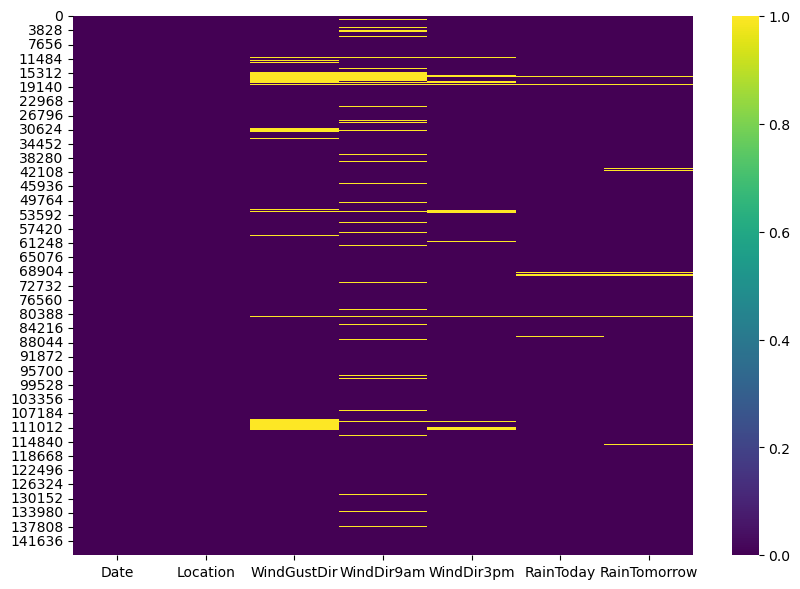

In [13]:
# Plotting missing values

plt.figure(figsize=(10,7))
sns.heatmap(df[categorical].isnull(), cmap='viridis')
plt.show()

### Frequency counts of categorical variables

In [15]:
# Frequency counts of categorical variables

for var in categorical:
    print(df[var].value_counts())

Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAA

In [16]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/float(len(df)))

Date
2013-11-12    0.000337
2014-09-01    0.000337
2014-08-23    0.000337
2014-08-24    0.000337
2014-08-25    0.000337
                ...   
2007-11-29    0.000007
2007-11-28    0.000007
2007-11-27    0.000007
2007-11-26    0.000007
2008-01-31    0.000007
Name: count, Length: 3436, dtype: float64
Location
Canberra            0.023622
Sydney              0.022989
Darwin              0.021951
Melbourne           0.021951
Brisbane            0.021951
Adelaide            0.021951
Perth               0.021951
Hobart              0.021951
Albany              0.020899
MountGambier        0.020899
Ballarat            0.020899
Townsville          0.020899
GoldCoast           0.020899
Cairns              0.020899
Launceston          0.020899
AliceSprings        0.020899
Bendigo             0.020899
Albury              0.020899
MountGinini         0.020899
Wollongong          0.020899
Newcastle           0.020892
Tuggeranong         0.020892
Penrith             0.020892
Woomera             0.02

### Number of labels: cardinality


The number of labels within a categorical variable is known as cardinality. A high number of labels within a variable is known as high cardinality. High cardinality may pose some serious problems in the machine learning model. 

In [18]:
# check for cardinality in categorical variables

for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3436  labels
Location  contains  49  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


We can see that there is a Date variable which needs to be preprocessed. I will do preprocessing in the following section.

All the other variables contain relatively smaller number of variables.

### Feature Engineering of Date Variable

In [21]:
df['Date'].dtypes

dtype('O')

In [22]:
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
# extract year from date

df['Year'] = df['Date'].dt.year
df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int32

In [24]:
# extract month from date

df['Month'] = df['Date'].dt.month
df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int32

In [25]:
# extract day from date

df['Day'] = df['Date'].dt.day
df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int32

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

In [27]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

### Explore Categorical Variables

In [29]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane', 'Cairns',
       'GoldCoast', 'Townsville', 'Adelaide', 'MountGambier', 'Nuriootpa',
       'Woomera', 'Albany', 'Witchcliffe', 'PearceRAAF', 'PerthAirport',
       'Perth', 'SalmonGums', 'Walpole', 'Hobart', 'Launceston',
       'AliceSprings', 'Darwin', 'Katherine', 'Uluru'], dtype=object)

In [30]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        3009
PearceRAAF          3009
Witchcliffe         3009
BadgerysCreek       3009
Mildura             3009
NorfolkIsland       3009
MelbourneAirport    3009
Richmond            3009
SydneyAirport       3009
WaggaWagga          3009
Williamtown     

In [31]:
# One Hot Encoding of Location variable

pd.get_dummies(df.Location, drop_first=True, dtype='int').head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Explore WindGustDir variable

In [33]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [34]:
# check labels in WindGustDir variable

df.WindGustDir.unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [35]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

WindGustDir
W      9915
SE     9418
N      9313
SSE    9216
E      9181
S      9168
WSW    9069
SW     8967
SSW    8736
WNW    8252
NW     8122
ENE    8104
ESE    7372
NE     7133
NNW    6620
NNE    6548
Name: count, dtype: int64

In [36]:
# One Hot Encoding of WindGustDir variable

pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True,dtype='int').head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [37]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).sum(axis=0)

ENE     7857
ESE     8505
N       8890
NE      8263
NNE     6590
NNW     7870
NW      8610
S       9926
SE     10838
SSE     9399
SSW     8156
SW      9354
W      10110
WNW     8874
WSW     9518
NaN     4228
dtype: int64

There are 4228 missing values in the WindDir3pm variable.

### Explore RainToday variable

In [40]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [41]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [42]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

RainToday
No     110319
Yes     31880
Name: count, dtype: int64

In [43]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True, dtype='int').head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [44]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True, dtype='int').sum(axis=0)

Yes    31880
NaN     3261
dtype: int64

There are 3261 missing values in the RainToday variable.

### Explore Numerical Variables

In [47]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [48]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [49]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
Year                 0
Month                0
Day                  0
dtype: int64

In [50]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

In [51]:
# draw boxplots to visualize outliers

for ind, col in enumerate(numerical):
    print(ind, col)

0 MinTemp
1 MaxTemp
2 Rainfall
3 Evaporation
4 Sunshine
5 WindGustSpeed
6 WindSpeed9am
7 WindSpeed3pm
8 Humidity9am
9 Humidity3pm
10 Pressure9am
11 Pressure3pm
12 Cloud9am
13 Cloud3pm
14 Temp9am
15 Temp3pm
16 Year
17 Month
18 Day


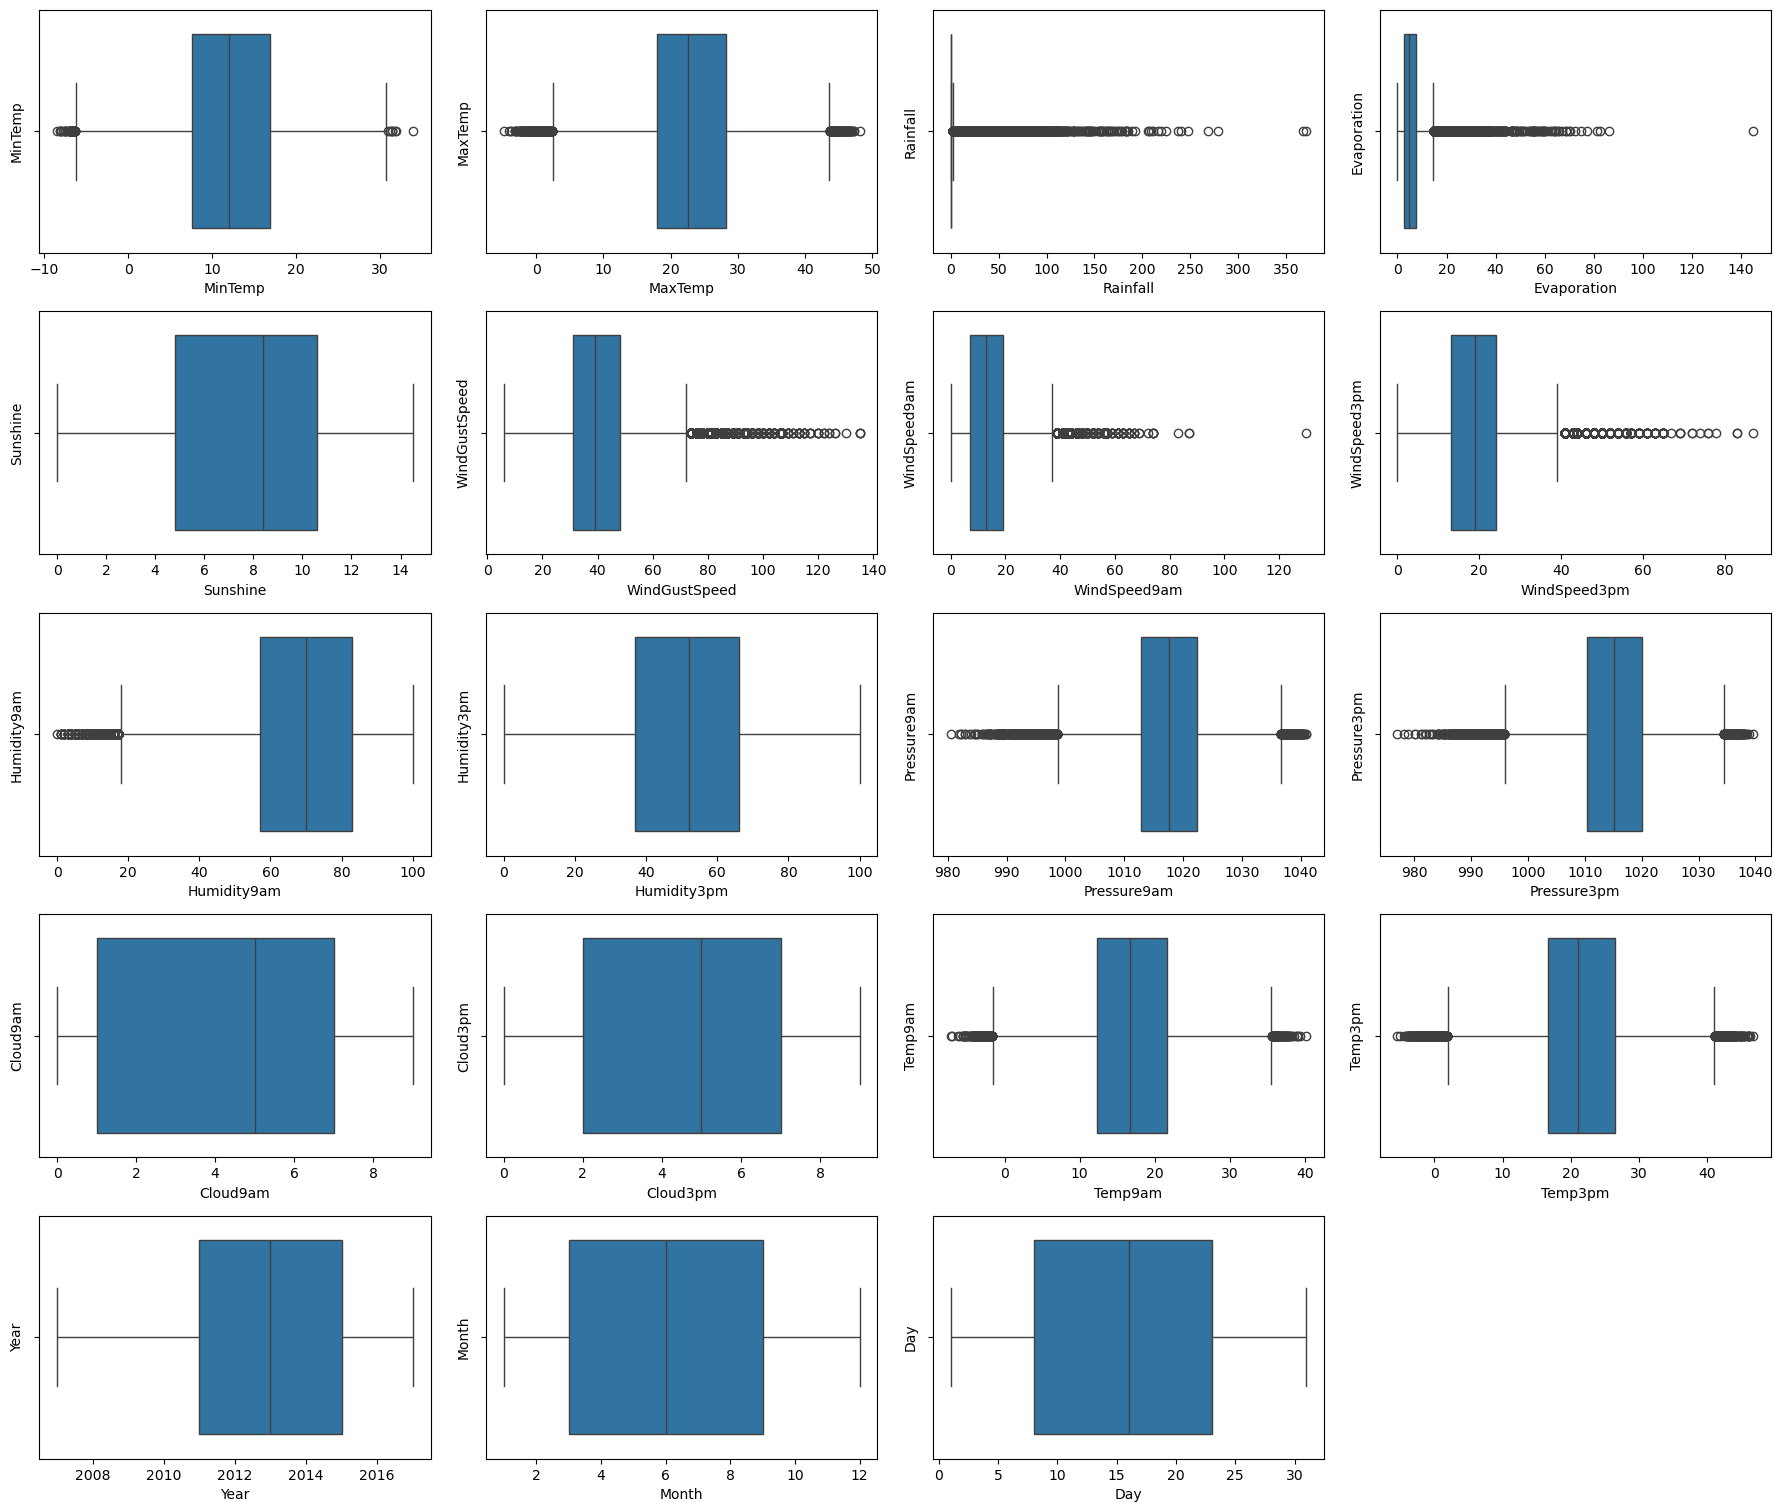

In [52]:
plt.figure(figsize=(18,len(numerical)*3))
for ind, col in enumerate(numerical):
    plt.subplot(len(numerical), 4, ind + 1)
    sns.boxplot(x=col, data=df[numerical])
    plt.ylabel(col)
plt.tight_layout()
plt.show()

we can see that the MinTemp, MaxTemp, Rainfall, Evaporation, WindSpeed9am ,WindSpeed3pm, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm columns contain outliers.

### Check the distribution of variables

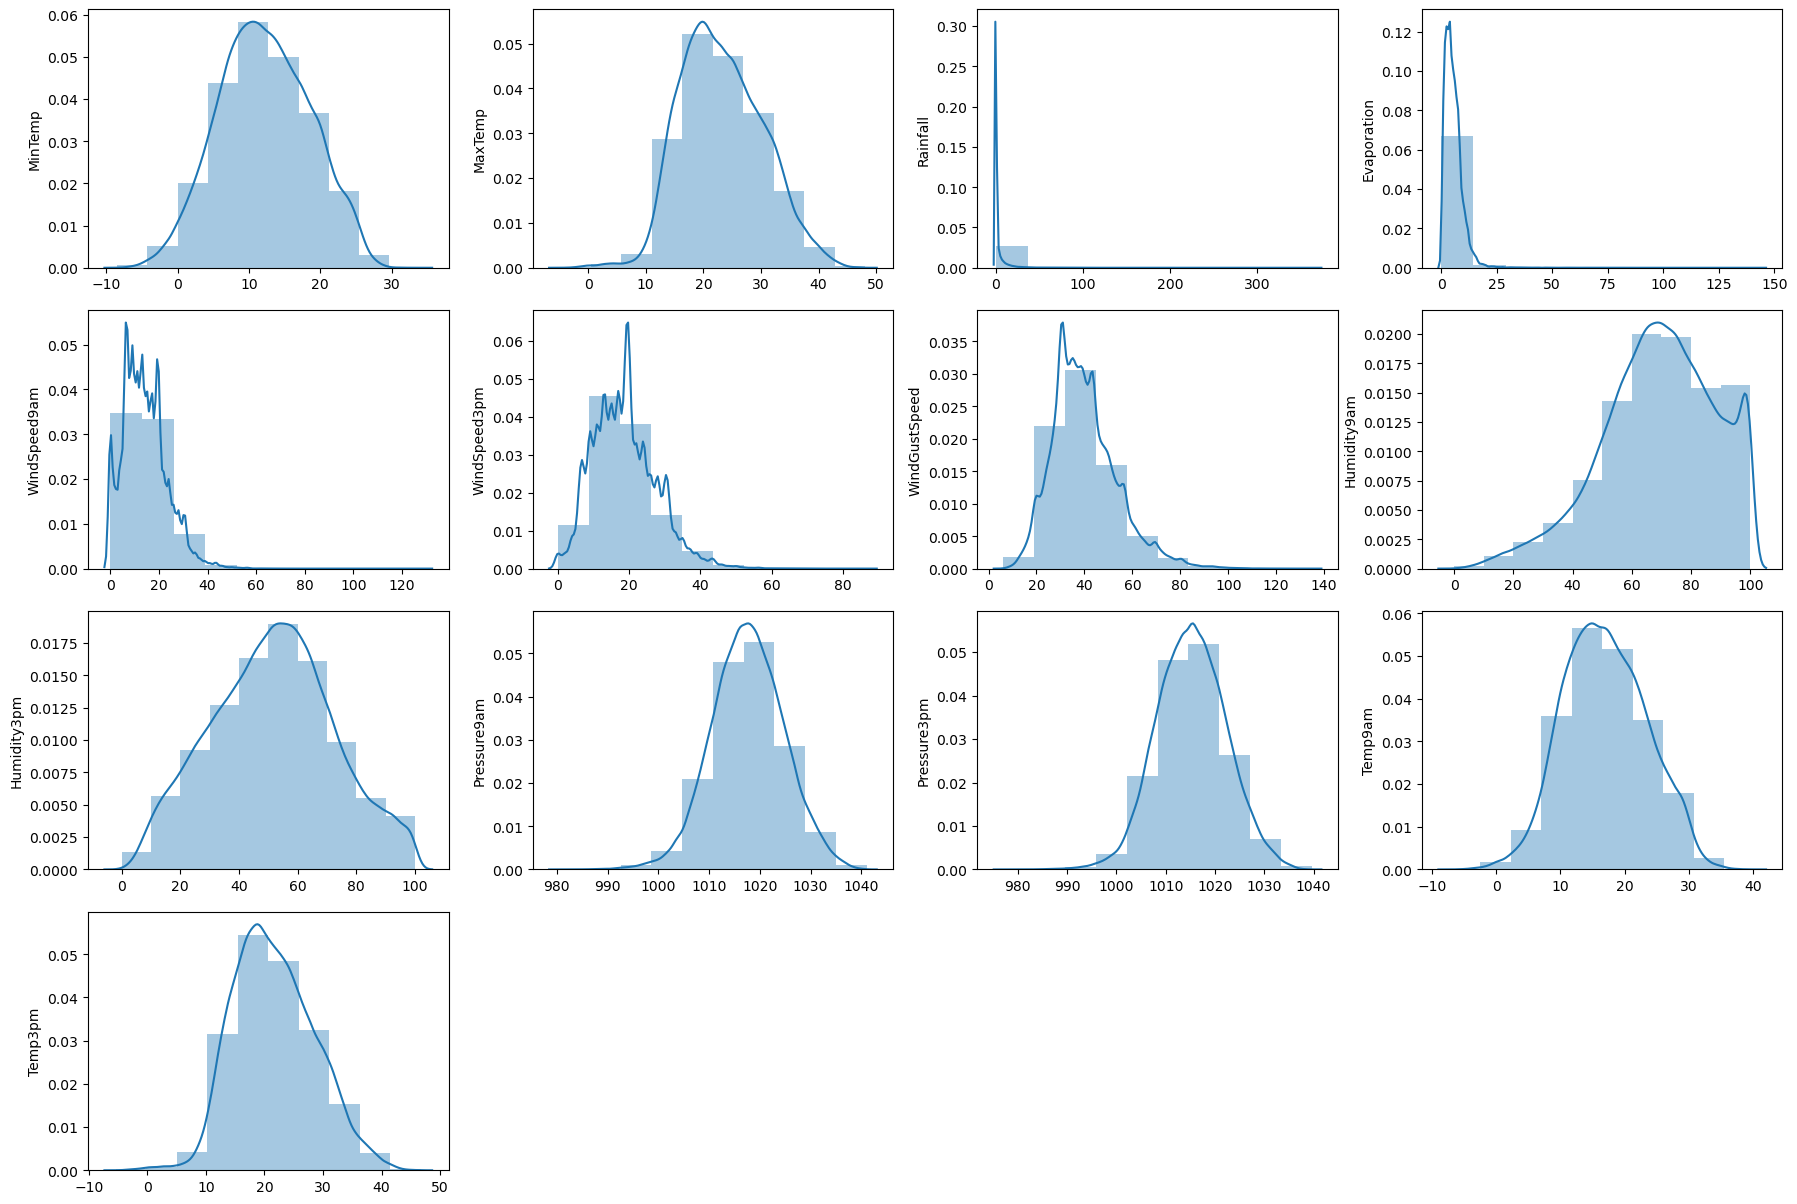

In [55]:
# plot histogram to check distribution of columns with outliers

out_var = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindSpeed9am', 'WindSpeed3pm', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

plt.figure(figsize=(18,len(out_var)*3))
for ind, col in enumerate(out_var):
    plt.subplot(len(out_var), 4, ind + 1)
    sns.distplot(x=df[col], bins=10)
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [56]:
# find outliers for MinTemp variable

IQR = df.MinTemp.quantile(0.75) - df.MinTemp.quantile(0.25)
Lower_fence = df.MinTemp.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.MinTemp.quantile(0.75) + (IQR * (1.5))
print(f'MinTemp outliers are values < {Lower_fence} or > {Upper_fence}')

MinTemp outliers are values < -6.35 or > 30.849999999999998


In [57]:
# find outliers for MaxTemp variable

IQR = df.MaxTemp.quantile(0.75) - df.MaxTemp.quantile(0.25)
Lower_fence = df.MaxTemp.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.MaxTemp.quantile(0.75) + (IQR * (1.5))
print(f'MaxTemp outliers are values < {Lower_fence} or > {Upper_fence}')

MaxTemp outliers are values < 2.4499999999999975 or > 43.65


In [58]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * (1.5))
print(f'Rainfall outliers are values < {Lower_fence} or > {Upper_fence}')

Rainfall outliers are values < -1.2000000000000002 or > 2.0


In [59]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * (1.5))
print(f'Evaporation outliers are values < {Lower_fence} or > {Upper_fence}')

Evaporation outliers are values < -4.600000000000001 or > 14.600000000000001


In [60]:
# find outliers for WindSpeed9am variable

IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * (1.5))
print(f'WindSpeed9am outliers are values < {Lower_fence} or > {Upper_fence}')

WindSpeed9am outliers are values < -11.0 or > 37.0


In [61]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * (1.5))
print(f'WindSpeed3pm outliers are values < {Lower_fence} or > {Upper_fence}')

WindSpeed3pm outliers are values < -3.5 or > 40.5


In [62]:
# find outliers for WindGustSpeed variable

IQR = df.WindGustSpeed.quantile(0.75) - df.WindGustSpeed.quantile(0.25)
Lower_fence = df.WindGustSpeed.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.WindGustSpeed.quantile(0.75) + (IQR * (1.5))
print(f'WindGustSpeed outliers are values < {Lower_fence} or > {Upper_fence}')

WindGustSpeed outliers are values < 5.5 or > 73.5


In [63]:
# find outliers for Humidity9am variable

IQR = df.Humidity9am.quantile(0.75) - df.Humidity9am.quantile(0.25)
Lower_fence = df.Humidity9am.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.Humidity9am.quantile(0.75) + (IQR * (1.5))
print(f'Humidity9am outliers are values < {Lower_fence} or > {Upper_fence}')

Humidity9am outliers are values < 18.0 or > 122.0


In [64]:
# find outliers for Humidity3pm variable

IQR = df.Humidity3pm.quantile(0.75) - df.Humidity3pm.quantile(0.25)
Lower_fence = df.Humidity3pm.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.Humidity3pm.quantile(0.75) + (IQR * (1.5))
print(f'Humidity3pm outliers are values < {Lower_fence} or > {Upper_fence}')

Humidity3pm outliers are values < -6.5 or > 109.5


In [65]:
# find outliers for Pressure9am variable

IQR = df.Pressure9am.quantile(0.75) - df.Pressure9am.quantile(0.25)
Lower_fence = df.Pressure9am.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.Pressure9am.quantile(0.75) + (IQR * (1.5))
print(f'Pressure9am outliers are values < {Lower_fence} or > {Upper_fence}')

Pressure9am outliers are values < 998.65 or > 1036.65


In [66]:
# find outliers for Pressure3pm variable

IQR = df.Pressure3pm.quantile(0.75) - df.Pressure3pm.quantile(0.25)
Lower_fence = df.Pressure3pm.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.Pressure3pm.quantile(0.75) + (IQR * (1.5))
print(f'Pressure3pm outliers are values < {Lower_fence} or > {Upper_fence}')

Pressure3pm outliers are values < 996.0 or > 1034.4


In [67]:
# find outliers for Temp9am variable

IQR = df.Temp9am.quantile(0.75) - df.Temp9am.quantile(0.25)
Lower_fence = df.Temp9am.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.Temp9am.quantile(0.75) + (IQR * (1.5))
print(f'Temp9am outliers are values < {Lower_fence} or > {Upper_fence}')

Temp9am outliers are values < -1.6500000000000004 or > 35.550000000000004


In [68]:
# find outliers for Temp3pm variable

IQR = df.Temp3pm.quantile(0.75) - df.Temp3pm.quantile(0.25)
Lower_fence = df.Temp3pm.quantile(0.25) - (IQR * (1.5))
Upper_fence = df.Temp3pm.quantile(0.75) + (IQR * (1.5))
print(f'Temp3pm outliers are values < {Lower_fence} or > {Upper_fence}')

Temp3pm outliers are values < 1.9000000000000057 or > 41.099999999999994


## Declare feature variable and target variable

In [70]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

## Split data into training and test set

In [72]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [73]:
X_train.shape, X_test.shape

((116368, 24), (29092, 24))

## Feature Engineering

Feature Engineering is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power.

In [76]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int32
Month              int32
Day                int32
dtype: object

In [77]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [78]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [79]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp           1183
MaxTemp           1019
Rainfall          2617
Evaporation      50355
Sunshine         55899
WindGustSpeed     8218
WindSpeed9am      1409
WindSpeed3pm      2456
Humidity9am       2147
Humidity3pm       3598
Pressure9am      12091
Pressure3pm      12064
Cloud9am         44796
Cloud3pm         47557
Temp9am           1415
Temp3pm           2865
Year                 0
Month                0
Day                  0
dtype: int64

In [80]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp            302
MaxTemp            242
Rainfall           644
Evaporation      12435
Sunshine         13936
WindGustSpeed     2045
WindSpeed9am       358
WindSpeed3pm       606
Humidity9am        507
Humidity3pm        909
Pressure9am       2974
Pressure3pm       2964
Cloud9am         11092
Cloud3pm         11801
Temp9am            352
Temp3pm            744
Year                 0
Month                0
Day                  0
dtype: int64

In [81]:
# print percentage of missing values in the numerical variables in training set

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0102
MaxTemp 0.0088
Rainfall 0.0225
Evaporation 0.4327
Sunshine 0.4804
WindGustSpeed 0.0706
WindSpeed9am 0.0121
WindSpeed3pm 0.0211
Humidity9am 0.0185
Humidity3pm 0.0309
Pressure9am 0.1039
Pressure3pm 0.1037
Cloud9am 0.385
Cloud3pm 0.4087
Temp9am 0.0122
Temp3pm 0.0246


In [82]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)

In [83]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [84]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [85]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.071068
WindDir9am     0.072597
WindDir3pm     0.028951
RainToday      0.022489
dtype: float64

In [86]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.07106764746322013
WindDir9am 0.07259727760208992
WindDir3pm 0.028951258077822083
RainToday 0.02248900041248453


In [87]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [88]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [89]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [90]:
# check missing values in X_train

X_train.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [91]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

### Engineering outliers in numerical variables

The MinTemp, MaxTemp, Rainfall, Evaporation, WindSpeed9am ,WindSpeed3pm, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm columns contain outliers. 

Using top-coding approach to cap maximum values and remove outliers from the above variables.

In [94]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

In [95]:
for df3 in [X_train, X_test]:
    df3['MinTemp'] = max_value(df3, 'MinTemp', 30.85)
    df3['MaxTemp'] = max_value(df3, 'MaxTemp', 43.65)
    df3['Rainfall'] = max_value(df3, 'Rainfall', 2.0)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 14.6)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 37.0)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 40.5)
    df3['WindGustSpeed'] = max_value(df3, 'WindGustSpeed', 73.5)
    df3['Humidity9am'] = max_value(df3, 'Humidity9am', 122.0)
    df3['Humidity3pm'] = max_value(df3, 'Humidity3pm', 109.5)
    df3['Pressure9am'] = max_value(df3, 'Pressure9am', 1036.65)
    df3['Pressure3pm'] = max_value(df3, 'Pressure3pm', 1034.4)
    df3['Temp9am'] = max_value(df3, 'Temp9am', 35.55)
    df3['Temp3pm'] = max_value(df3, 'Temp3pm', 41.1)

In [96]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190153,23.201859,0.477415,5.046728,7.982476,39.797337,13.943747,18.603864,68.950691,51.605828,1017.637376,1015.242641,4.664092,4.710728,16.978765,21.654104,2012.767058,6.395091,15.731954
std,6.366786,7.081628,0.787670,2.587991,2.761639,12.520164,8.558597,8.443781,18.811437,20.439999,6.720738,6.654550,2.280687,2.106040,6.447548,6.838993,2.538401,3.425451,8.796931
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,30.850000,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,9.000000,8.000000,35.550000,41.100000,2017.000000,12.000000,31.000000


We can now see that the outliers in  MinTemp, MaxTemp, Rainfall, Evaporation, WindSpeed9am ,WindSpeed3pm, WindGustSpeed, Humidity9am, Humidity3pm, Pressure9am, Pressure3pm, Temp9am, Temp3pm columns are capped.

#### Encode categorical variables

In [99]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [100]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
22926,NorfolkIsland,ESE,ESE,ESE,No
80735,Watsonia,NE,NNW,NNE,No
121764,Perth,SW,N,SW,Yes
139821,Darwin,ESE,ESE,E,No
1867,Albury,E,ESE,E,Yes


In [101]:
# encode RainToday variable

import category_encoders as ce
encoder=ce.BinaryEncoder(cols=['RainToday'])
X_train=encoder.fit_transform(X_train)
X_test=encoder.transform(X_test)

In [102]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,Albury,15.7,17.6,2.0,4.7,8.4,E,20.0,ESE,E,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


Creating the X_train set

In [104]:
location_dummies = pd.get_dummies(X_train.Location, prefix='Location', dtype=int)
wind_gust_dir_dummies = pd.get_dummies(X_train.WindGustDir, prefix='WindGustDir', dtype=int)
wind_dir_9am_dummies = pd.get_dummies(X_train.WindDir9am, prefix='WindDir9am', dtype=int)
wind_dir_3pm_dummies = pd.get_dummies(X_train.WindDir3pm, prefix='WindDir3pm', dtype=int)

In [105]:
X_train=pd.concat([X_train[numerical], X_train[['RainToday_0','RainToday_1']],
                  location_dummies,
                  wind_gust_dir_dummies,
                  wind_dir_9am_dummies,
                  wind_dir_3pm_dummies], axis=1)

In [106]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,0,0,0,0,0,0,0,0,0,0
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,0,0,0,0,0,0,0,0,0,0
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,0,0,0,0,0,0,1,0,0,0
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,...,0,0,0,0,0,0,0,0,0,0
1867,15.7,17.6,2.0,4.7,8.4,20.0,11.0,13.0,100.0,100.0,...,0,0,0,0,0,0,0,0,0,0


Similarly, creating the X_test set.

In [108]:
location_dummies_test = pd.get_dummies(X_test.Location, prefix='Location', dtype=int)
wind_gust_dir_dummies_test = pd.get_dummies(X_test.WindGustDir, prefix='WindGustDir', dtype=int)
wind_dir_9am_dummies_test = pd.get_dummies(X_test.WindDir9am, prefix='WindDir9am', dtype=int)
wind_dir_3pm_dummies_test = pd.get_dummies(X_test.WindDir3pm, prefix='WindDir3pm', dtype=int)

In [109]:
X_test=pd.concat([X_test[numerical], X_test[['RainToday_0','RainToday_1']],
                  location_dummies_test,
                  wind_gust_dir_dummies_test,
                  wind_dir_9am_dummies_test,
                  wind_dir_3pm_dummies_test], axis=1)

In [110]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,...,0,0,0,0,0,0,0,0,0,0
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,...,0,0,0,0,0,0,0,0,0,0
124058,5.1,17.2,0.2,4.7,8.4,50.0,28.0,22.0,68.0,51.0,...,0,0,0,0,0,0,0,1,0,0
99214,11.9,16.8,1.0,4.7,8.4,28.0,11.0,13.0,80.0,79.0,...,0,0,0,0,0,0,1,0,0,0
25097,7.5,21.3,0.0,4.7,8.4,15.0,2.0,7.0,88.0,52.0,...,0,0,0,0,0,0,0,0,0,0


## Feature Scaling

In [112]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190153,23.201859,0.477415,5.046728,7.982476,39.797337,13.943747,18.603864,68.950691,51.605828,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,6.366786,7.081628,0.787670,2.587991,2.761639,12.520164,8.558597,8.443781,18.811437,20.439999,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.850000,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [113]:
cols=X_train.columns

In [114]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [115]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [116]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,...,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,0.525798,0.577954,0.238707,0.345666,0.550516,0.500701,0.376858,0.459355,0.689507,0.516058,...,0.054078,0.059123,0.068447,0.103723,0.065224,0.056055,0.064786,0.069323,0.060309,0.064958
std,0.161799,0.146164,0.393835,0.177260,0.190458,0.185484,0.231313,0.208488,0.188114,0.204400,...,0.226173,0.235855,0.252512,0.304902,0.246922,0.230029,0.246149,0.254004,0.238059,0.246452
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.411690,0.470588,0.000000,0.273973,0.565517,0.370370,0.189189,0.320988,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.520966,0.565531,0.000000,0.321918,0.579310,0.488889,0.351351,0.469136,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.642948,0.681115,0.300000,0.356164,0.593103,0.592593,0.513514,0.592593,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [117]:
X_test = pd.DataFrame(X_test, columns=[cols])
X_test.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW
count,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,...,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000,29092.000000
mean,0.526033,0.579282,0.235924,0.347338,0.553072,0.499319,0.376319,0.456794,0.687035,0.513437,...,0.054207,0.059467,0.067407,0.102984,0.062182,0.056132,0.062388,0.070225,0.063798,0.067338
std,0.161654,0.146472,0.392616,0.179634,0.189116,0.185275,0.230962,0.208309,0.190291,0.205953,...,0.226430,0.236500,0.250730,0.303943,0.241490,0.230181,0.241864,0.255531,0.244396,0.250611
min,0.038119,0.033024,0.000000,0.000000,0.000000,0.014815,0.000000,0.000000,0.010000,0.010000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.409149,0.470588,0.000000,0.287671,0.572414,0.370370,0.189189,0.320988,0.570000,0.370000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.520966,0.565531,0.000000,0.321918,0.579310,0.488889,0.351351,0.469136,0.700000,0.520000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.642948,0.681115,0.300000,0.369863,0.600000,0.592593,0.513514,0.592593,0.830000,0.650000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,0.986207,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Imputation of Target Variable

In [119]:
y_train = y_train.fillna(y_train.mode()[0])

In [120]:
y_test = y_test.fillna(y_test.mode()[0])

## Model training

In [122]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

## Predict results

In [124]:
y_pred_test = logreg.predict(X_test)
y_pred_test

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

### predict_proba method
predict_proba method gives the probabilities for the target variable(0 and 1 in this case, in array form.

In [126]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.79768929, 0.73073523, 0.78877389, ..., 0.45545767, 0.64285615,
       0.9704284 ])

In [127]:
# probability of getting output as 1 - no rain

logreg.predict_proba(X_test)[:,1]

array([0.20231071, 0.26926477, 0.21122611, ..., 0.54454233, 0.35714385,
       0.0295716 ])

## Check accuracy score

In [129]:
from sklearn.metrics import accuracy_score

test_acc_sc = round(accuracy_score(y_test, y_pred_test), 4)
test_acc_sc

0.8484

#### Compare the train-set and test-set accuracy

In [131]:
y_pred_train = logreg.predict(X_train)
y_pred_train

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [132]:
train_acc_sc = round(accuracy_score(y_train, y_pred_train), 4)
train_acc_sc

0.8486

## overfitting and underfitting

In [134]:
# print the scores on training and test set

print('Training set score:',round(logreg.score(X_train, y_train), 4))

Training set score: 0.8486


In [135]:
print('Testing set score:',round(logreg.score(X_test, y_test), 4))

Testing set score: 0.8484


These two values are quite comparable. So, there is no question of overfitting. 

It is likely the case of underfitting.

## Compare model accuracy with null accuracy

So, the model accuracy is 0.8484. But, we cannot say that our model is very good based on the above accuracy. We must compare it with the null accuracy. Null accuracy is the accuracy that could be achieved by always predicting the most frequent class.

In [139]:
# check class distribution in test set

y_test.value_counts()

RainTomorrow
No     22726
Yes     6366
Name: count, dtype: int64

In [140]:
# check null accuracy score

null_accuracy = (22726/(22726+6366))

print('Null accuracy score:', null_accuracy)

Null accuracy score: 0.7811769558641551


We can see that our model accuracy score is 0.8484 but null accuracy score is 0.7812. So, we can conclude that our Logistic Regression model is doing a very good job in predicting the class labels.

## Confusion matrix

In [143]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[21522  1204]
 [ 3207  3159]]

True Positives(TP) =  21522

True Negatives(TN) =  3159

False Positives(FP) =  1204

False Negatives(FN) =  3207


<Axes: >

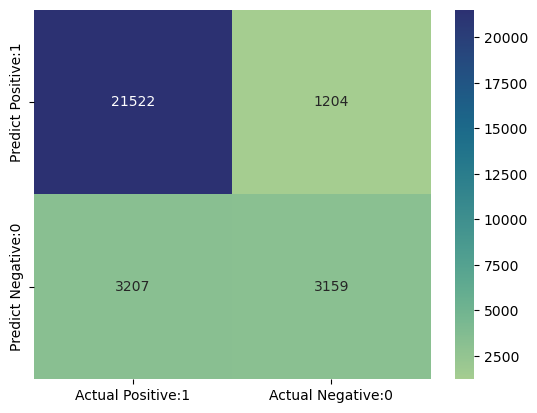

In [144]:
# visualize confusion matrix

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, cmap="crest", fmt='')

## Classification metrices

### Classification Report

In [147]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

          No       0.87      0.95      0.91     22726
         Yes       0.72      0.50      0.59      6366

    accuracy                           0.85     29092
   macro avg       0.80      0.72      0.75     29092
weighted avg       0.84      0.85      0.84     29092



### Classification accuracy

In [149]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [150]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)
classification_accuracy

0.8483775608414684

### Classification error

In [152]:
Classification_error = (FP + FN) / float(TP + TN + FP + FN)
Classification_error

0.15162243915853155

### Precision

In [154]:
precision = TP / float(TP + FP)
precision

0.9470210331778579

### Recall or True Positive Rate

In [156]:
recall = TP / float(TP + FN)
recall

0.8703142059929637

### False Positive Rate

In [158]:
false_positive_rate = FP / float(FP + TN)
false_positive_rate

0.27595691038276415

### Specificity

In [160]:
specificity = TN / (TN + FP)
specificity 

0.7240430896172358

### f1-score

In [162]:
f1_score = (2*precision*recall)/(precision+recall)
f1_score

0.9070487830576335

### Support
Support is the actual number of occurrences of the class in our dataset.

## Adjusting the threshold level

In [165]:
# the first 10 predicted probabilities

y_pred_prob = logreg.predict_proba(X_test)[0:10]
y_pred_prob

array([[0.79768929, 0.20231071],
       [0.73073523, 0.26926477],
       [0.78877389, 0.21122611],
       [0.55720034, 0.44279966],
       [0.92566903, 0.07433097],
       [0.95376744, 0.04623256],
       [0.55358742, 0.44641258],
       [0.46234335, 0.53765665],
       [0.79803878, 0.20196122],
       [0.7302815 , 0.2697185 ]])

In [166]:
# store the probabilities in dataframe

y_pred_prob_df = pd.DataFrame(data=y_pred_prob, columns=['Prob of - No rain tomorrow (0)', 'Prob of - Rain tomorrow (1)'])
y_pred_prob_df

,Prob of - No rain tomorrow (0),Prob of - Rain tomorrow (1)
0,0.797689,0.202311
1,0.730735,0.269265
2,0.788774,0.211226
3,0.557200,0.442800
4,0.925669,0.074331
5,0.953767,0.046233
6,0.553587,0.446413
7,0.462343,0.537657
8,0.798039,0.201961
9,0.730282,0.269718


In [167]:
# predicted probabilities for class 1 - Probability of rain

y_pred_proba1 = logreg.predict_proba(X_test)[:, 1]

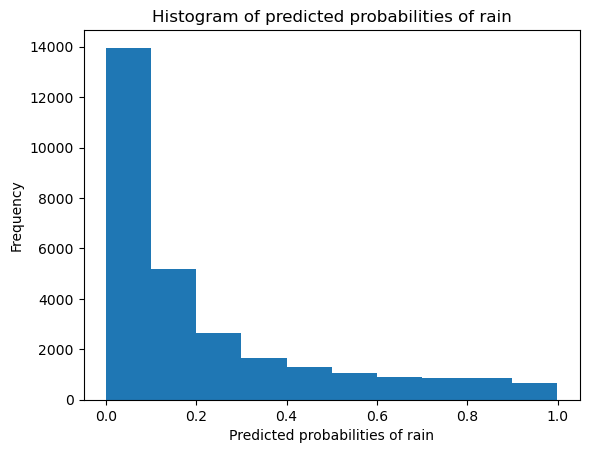

In [168]:
# plot histogram of predicted probabilities

plt.hist(y_pred_proba1, bins = 10)
plt.title('Histogram of predicted probabilities of rain')
plt.xlabel('Predicted probabilities of rain')
plt.ylabel('Frequency')
plt.show()

##### Observations:

1. We can see that the above histogram is highly positive skewed.

2. The first column tell us that there are approximately 14000 observations with probability between 0.0 and 0.1.

3. There are small number of observations with probability > 0.5. So, these small number of observations predict that there will be rain tomorrow.

4. Majority of observations predict that there will be no rain tomorrow.

## ROC - AUC

### ROC Curve

ROC Curve stands for Receiver Operating Characteristic Curve. An ROC Curve is a plot which shows the performance of a classification model at various classification threshold levels.

The ROC Curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various threshold levels.

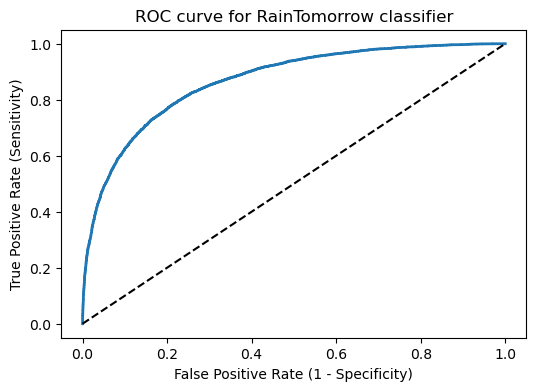

In [179]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba1, pos_label = 'Yes')

plt.figure(figsize=(6,4))

plt.plot(fpr, tpr, linewidth=2)

plt.plot([0,1], [0,1], 'k--' )

plt.title('ROC curve for RainTomorrow classifier')

plt.xlabel('False Positive Rate (1 - Specificity)')

plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

ROC curve help us to choose a threshold level that balances sensitivity and specificity for a particular context.

### ROC AUC

ROC AUC stands for Receiver Operating Characteristic - Area Under Curve. It is a technique to compare classifier performance. In this technique, we measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

So, ROC AUC is the percentage of the ROC plot that is underneath the curve.

In [183]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_pred_proba1)
ROC_AUC

0.8672648458134579

##### Observations:

ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.

In [186]:
# calculate cross-validated ROC AUC 

from sklearn.model_selection import cross_val_score

Cross_validated_ROC_AUC = cross_val_score(logreg, X_train, y_train, cv=5, scoring='roc_auc').mean()
Cross_validated_ROC_AUC

0.8675164287180465

## Model evaluation and improvement

In this section, I will employ several techniques to improve the model performance. I will discuss 3 techniques which are used in practice for performance improvement. These are:

1. Recursive feature elimination,
2. K-fold cross validation and
3. Hyperparameter optimization using GridSearchCV.

### 1. Recursive Feature Elimination with Cross Validation

In [189]:
from sklearn.feature_selection import RFECV
rfecv = RFECV(estimator=logreg, step=1, cv=2, scoring='accuracy')
rfecv = rfecv.fit(X_train, y_train)

In [190]:
print("Optimal number of features :", rfecv.n_features_)

Optimal number of features : 109


In [191]:
# transform the training data
X_train_rfecv = rfecv.transform(X_train)

# train classifier
logreg.fit(X_train_rfecv, y_train)

LogisticRegression()

In [192]:
# test classifier on test data
X_test_rfecv = rfecv.transform(X_test)
y_pred_rfecv = logreg.predict(X_test_rfecv)

In [193]:
# Classifier score
logreg.score(X_test_rfecv,y_test)

0.8485150556854117

Our original model accuracy score is 0.8484 whereas accuracy score after RFECV is 0.8485. So, we can obtain approximately similar accuracy but with reduced or optimal set of features.

In [195]:
# confusion-matrix for this model to get an idea of errors our model is making

cm1 = confusion_matrix(y_test, y_pred_rfecv)

print('Confusion matrix\n\n', cm1)

print('\nTrue Positives(TP1) = ', cm1[0,0])

print('\nTrue Negatives(TN1) = ', cm1[1,1])

print('\nFalse Positives(FP1) = ', cm1[0,1])

print('\nFalse Negatives(FN1) = ', cm1[1,0])

Confusion matrix

 [[21532  1194]
 [ 3213  3153]]

True Positives(TP1) =  21532

True Negatives(TN1) =  3153

False Positives(FP1) =  1194

False Negatives(FN1) =  3213


In this model we got slightly higher false negatives compared to our Original Model.

### 2. k-Fold Cross Validation

In [198]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(logreg, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:', scores)

Cross-validation scores: [0.8489731  0.84940277 0.8497465  0.84466979 0.84802131]


In [199]:
# compute Average cross-validation score

scores.mean()

0.8481626939168281

Our, original model score is found to be 0.8486. The average cross-validation score is 0.8482. So, we can conclude that cross-validation does not result in performance improvement.

### 3. Hyperparameter Optimization using GridSearch CV

In [202]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']}, 
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = logreg,  
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [203]:
best_score = grid_search.best_score_
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [204]:
print(best_score)
print(best_params)
print(best_model)

0.8481798838000817
{'C': 100}
LogisticRegression(C=100)


In [205]:
# calculate GridSearch CV score on test set

grid_search.score(X_test, y_test)

0.8487556716623127

##### Observations:

1. Our original model test accuracy is 0.8486 while GridSearch CV accuracy is 0.8488.
2. 
We can see that GridSearch CV improve the performance for this particular model.

### Conclusion

1. The logistic regression model accuracy score is 0.8484. So, the model does a very good job in predicting whether or not it will rain tomorrow in Australia.
2. The model shows no signs of overfitting.
3. ROC AUC of our model approaches towards 1. So, we can conclude that our classifier does a good job in predicting whether it will rain tomorrow or not.
4. Original model accuracy score is 0.8484 whereas accuracy score after RFECV is 0.8485. So, we can obtain approximately similar accuracy but with reduced or optimal set of features.
5. In the original model, we have FP = 1204 whereas FP1 = 1194. So, we get approximately same number of false positives. Also, FN = 3207 whereas FN1 = 3213. So, we get slighly higher false negatives.
6. Original model score is found to be 0.8486. The average cross-validation score is 0.8482. So, we can conclude that cross-validation does not result in performance improvement.
7. Original model test accuracy is 0.8484 while GridSearch CV accuracy is 0.8488. We can see that GridSearch CV improve the performance for this particular model.